# Espacio de Probabilidad

## Enfoque clásico

Se le conoce como **experimento aleatorio** a un experimento cuyo resultado no puede ser predecido con certeza, a pesar de ser realizado en condiciones idénticas.

#### Espacio muestral

Considerando el experimento aleatorio $\varepsilon$, suponemos que se conocen todos los posibles resultados de $\varepsilon$. Este conjunto de resultados es conocido como **espacio muestral** y se denota como $\Omega$.

**Ejemplo:**
- Si el resultados de un experimento consiste en el sexo de un recién nacido, entonces
$$ \Omega = \{ H,M \}. $$

#### Evento

Cualquier subconjunto de $\Omega$ es conocido como un **evento**.

**Ejemplo:**
- Considerando el ejemplo anterior, un evento $A$ pude ser $A=\{H\} $. 

### Probabilidad clásica (Laplaciana)

La probabilidad de un evento A se denota como $\mathbb{P}(A)$ y es un número real tal que $\mathbb{P}(A)\in[0,1]$, este número representa la frecuencia con la que ocurre el evento cuando el experimento es repetido continuamente. 

Clasicamente se define a la probabilidad del evento $A$ como:
$$ \mathbb{P}(A) = \frac{|A|}{|\Omega|} $$

Esta definición sólo es válida para espacios muestrales finitos. Además, el espacio $\Omega$ debe ser equiprobable, es decir, todos los elementos del espacio muestral son igualmente probables.

**Ejemplo:**

Sea el experimento aleatorio de lanzar una moneda 3 veces, de manera independiente, es decir, el $i$-ésimo lanzamiento no me afecta el $i+1$ lanzamiento. El espacio muestral de este experimento es:
$$ \Omega = \{A,S\}\times \{A,S\} \times \{A,S\} = \{A,S\}^3 $$

y se tiene que $|\Omega| = 2^{3}$.

Sean los eventos:
- $A$ : todos los resultados son águila
- $S$ : todos los resultados son soles
- $E$ : por lo menos un resultado es sol

Calcular la probabilidad de $A$.

$\color{green}\text{Solución}$

Para $A$, vamos a descomponer al conjunto de la siguiente manera $A = A_1 \cap A_2 \cap A_3$ donde $A_i$: cae águila en el $i$-ésimo lanzamiento.

In [1]:
# Se llama a las librerias 
import itertools 
from itertools import product

In [2]:
# Se crea el espacio muestral
omega = set(product(('A','S'),repeat=3))
print('El espacio muestral es:',omega)

# Se calcula la cardinalidad de omega
card_omega = len(omega)

# Creacion de los conjuntos A_1, A_2, A_3
a1 = {om for om in omega if om[0]=='A'}
a2 = {om for om in omega if om[1]=='A'}
a3 = {om for om in omega if om[2]=='A'}

# Obtenemos la intersección de los tres conjuntos 
a = a1.intersection(a2.intersection(a3))

# Se calcula la cardinalidad de a
card_A = len(a)

# Calculamos la probabilidad del evento A
p_A = card_A/card_omega
print('P(A)=',p_A)

El espacio muestral es: {('A', 'S', 'A'), ('S', 'A', 'S'), ('S', 'A', 'A'), ('S', 'S', 'A'), ('A', 'A', 'S'), ('S', 'S', 'S'), ('A', 'A', 'A'), ('A', 'S', 'S')}
P(A)= 0.125


### Probabilidad condicional

Dados dos eventos $A$ y $B$, se conoce como **probabilidad condicional** a la probabilidad de que $A$ ocurra basado en la ocurrencia del evento anterior $B$ y se denota como:
$$\mathbb{P}(A|B) $$
y se tiene la definición
$$ \mathbb{P}(A|B) = \frac{\mathbb{P}(A\cap B)}{\mathbb{P}(B)}$$

**Ejemplo**

Considerando el ejemplo resuelto de lanzar tres veces una moneda, se quiere calcular la probabilidad condicional de los siguientes eventos: 
 - B: el primer lanzamiento es águila.
 - C: dos de los resultados son águila.

$\color{green}\text{Solución}$


In [3]:
# Escribimos una función que nos regrese la probabilidad condicional de dos eventos

def prob_cond(e,f):
    return len(e & f ) / len (f)


# Obtenemos los subconjuntos del espacio muestral (B,C)
b = {om for om in omega if om[0]=='A'}
print('El evento B es:',b)

c = {om for om in omega if om.count('A')==2}
print('El evento C es:',c)


# Calculamos la probabilidad condicional P(B|C)
prob_BC = prob_cond(b,c)
print('P(B|C) = ',prob_BC)

El evento B es: {('A', 'S', 'A'), ('A', 'A', 'A'), ('A', 'S', 'S'), ('A', 'A', 'S')}
El evento C es: {('A', 'S', 'A'), ('A', 'A', 'S'), ('S', 'A', 'A')}
P(B|C) =  0.6666666666666666


#### Eventos independientes 

Se dice que $A$ es independiente de $B$ si conociendo que $B$ ha ocurrido la probabilidad de que $A$ ocurra no cambia. Matemáticamente, dos eventos $A$ y $B$ son independientes si:
$$ \mathbb{P}(A\cap B ) = \mathbb{P}(A)\mathbb{P}(B)$$

**Ejemplo**

Revisar si los eventos $B$ y $C$ son independientes

$\color{green}\text{Solución}$

In [4]:
# Escribimos una función que nos regrese la probabilidad de un evento
def prob(f):
    return len(f) / len(omega) 


# Escribimos una función que cheque si se trata de eventos independientes
def indep(e,f):
    return prob(e & f) == prob(e)*prob(f)


# Evaluamos la función con los eventos B y C
indep(b,c)

False

## Enfoque geométrico

En este caso, la probabilidad de un evento $A$ ya no se calcula a partir de la cardinalidad, sino a través de alguna característica geométrica según sea el problema, por ejemplo: área o volumen. 

Si el experimento aleatorio tiene un espacio muestral $\Omega \in \mathbb{R}^2$ con área bien definida y finita, entonces la **probabilidad geométrica** de $A\subseteq \Omega$ se define como
$$ \mathbb{P}(A) = \frac{\text{Área de }A}{\text{Área de }\Omega}$$
cuando $A$ tiene área bien definida.

**Ejemplo: El problema del encuentro**

Romeo y Julieta pretenden encontrarse en un lugar especifico entre $[0,60]$
 - Si Romeo llega primero, entonces piensa esperar 10 min.
 - Si Julieta llega primero, entonces piensa esperar 10 min.
Se elige un número al azar entre 0 y 60, supongamos que el par de números se elige sobre el cuadrado de modo que la probabilidad del evento sea el área favorable entre el área total.

Sea el evento
 - $A$: Romeo y Julieta se encuentran a una distancia de 10 min.

In [5]:
# Llamamos a las librerías 
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
# Vamos a generar 100,000 simulaciones
muestra = 100000

# Generamos los tiempos aleatorios entre [0,60]
# x: tiempo de llegada Romeo
# y: tiempo de llegada Julieta

x = np.random.uniform(0,60,muestra) # genera 100,000 números aleatorios entre 0 y 60
y = np.random.uniform(0,60,muestra)

# Vamos a añadir la condición de encuentro
encuentro = np.where(abs(x-y) <= 10,'r','b')


""" 
Si la diferencia de los tiempos es menor o igual a 10, entonces se encuentran (rojo)
si no, no se encuentran (azul) 
"""

# Calculamos la probabilidad de que se encuentren 
k = 0
for elemento in encuentro:
    if elemento == 'r':
        k+=1

print('La probabilidad del evento A es: {}.'.format(k/muestra))

La probabilidad del evento A es: 0.30679.


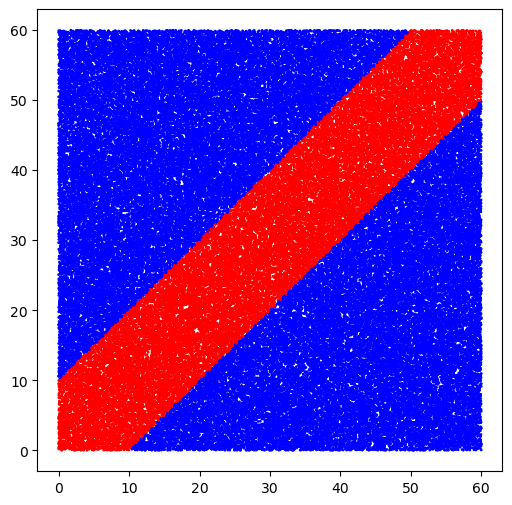

In [7]:
# Graficamos para visualizar geometricamente el resultado
plt.figure(figsize=(6,6))
plt.scatter(x,y,c=encuentro,s=1)
plt.show()

El área roja es la región donde Romeo y Julieta sí se encuentran.

## Enfoque frecuentista 

Considerando que un experimento aleatorio se lleva a cabo $n$ veces y se registra el número de veces que ocurre cierto evento $A$. Si denotamos como $n_A$ al número de veces que ocurre $A$, la **probabilidad frecuentista** del evento $A$ se define como
$$ \mathbb{P}(A) = \lim_{n\to \infty} \frac{n_A}{n}$$

**Ejemplo**

Simularemos muchos volados y veremos el comportamiento de la probabilidad respecto al número de volados 

$\color{green}\text{Solución}$

In [8]:
# Llamamos a las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Establecemos una semilla para poder reproducir los resultados 
np.random.seed(42)

# Simular 10,000 volados (0=sol, 1=águila)
volados = np.random.randint(0, 2, size=10000)

# Probabilidad de obtener águila
prob_aguila = np.cumsum(volados) / np.arange(1, len(volados)+1)

# Guardamos la información en un dataframe
df = pd.DataFrame({
    'Lanzamiento': np.arange(1, len(volados)+1),
    'Probabilidad Águila': prob_aguila
})

# Llamamos al dataframe
df

,Lanzamiento,Probabilidad Águila
0,1,0.000000
1,2,0.500000
2,3,0.333333
3,4,0.250000
4,5,0.200000
...,...,...
9995,9996,0.498699
9996,9997,0.498650
9997,9998,0.498700
9998,9999,0.498750


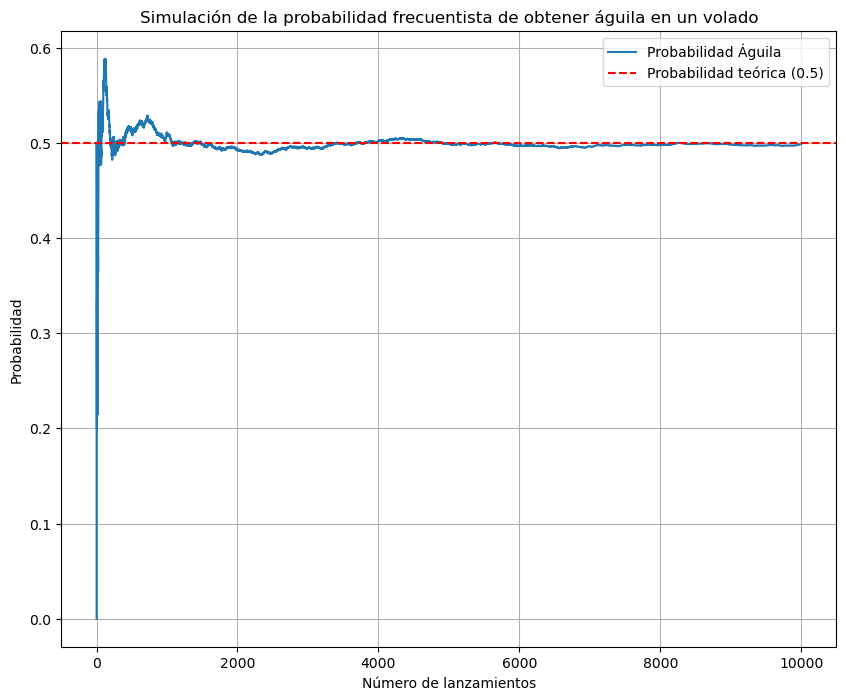

In [11]:
''' 
Realizamos una gráfica para observar el comportamiento 
de la probabilidad respecto al número de volados
''' 

plt.figure(figsize=(10,8))

plt.plot(df['Lanzamiento'],df['Probabilidad Águila'], label='Probabilidad Águila')
plt.axhline(0.5,c='r',linestyle ='--',label='Probabilidad teórica (0.5)')

plt.xlabel('Número de lanzamientos')
plt.ylabel('Probabilidad')
plt.title('Simulación de la probabilidad frecuentista de obtener águila en un volado')

plt.legend()
plt.grid()
plt.show()

## Axiomas de la probabilidad

Los tres axiomas fueron establecidos en $1933$ por el matemático ruso *Andrey Nikolaevich Kolmogorov*. No establecen la forma explícita de calcular probabilidades, solo son las reglas del juego al calcular las probabilidades.

$\color{blue}\textbf{Axiomas}$

Considerando un experimento aleatorio con espacio muestral $\Omega$, para cada evento $A \subseteq \Omega$, se asume que el número $\mathbb{P}(A)$ satisface lo siguiente:
 1. $0 \leq \mathbb{P}(A) \leq 1$
 2. $\mathbb{P}(\Omega) = 1$
 3. Para cualquier sucesión de eventos mutuamente excluyentes $(A_n)_{n\geq1}$ (es decir, $A_i \cap A_j = \varnothing$ cuando $i\neq j$)
 $$ \mathbb{P}\left(\bigcup_{n=1}^{\infty} A_n  \right) = \sum_{n=1}^{\infty} \mathbb{P}(A_n) $$

## Referencias

- Rincón, L. (2014). *Introducción a la probabilidad*. México: Universidad Nacional Autónoma de México, Facultad de Ciencias.

- Ross, S. M. (2010). *A First Course in Probability* (8a ed.). Upper Saddle River, New Jersey: Prentice Hall.